# Fit d'une image

Le fichier {download}`data/double_star.txt` contient une image de 64 par 64 pixels d'une étoile double. L'objectif de cette partie est d’ajuster cette image par la somme de deux Gaussiennes afin de déterminer la distance entre les étoiles.


1. Charger et afficher le fichier à l'aide de la fonction imshow
2. Définir une fonction de fit et tracer une image qui ressemble à celle ci. On pourra utiliser la fonction ```np.meshgrid```.

Il n'est pas possible de travailler directement sur des tableaux 2D pour le fit : l'ensemble des pixels de l'image doit être sous forme d'un tableau (taille $N$) ainsi que l'ensemble de coordonnées $(x,y)$ des ces points (tailles $N\times 2$).

3. Ecrire une fonction qui s'adapte au contraite du fit et effectuer le fit. 

4. Quelle est la distance et son incertitude (en pixel) entre les deux étoiles ?

-------------------

## Solution

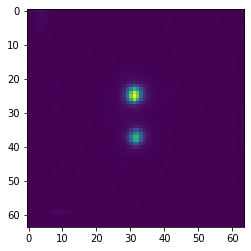

In [1]:
# Question 1
import numpy as np
from matplotlib.pyplot import figure
from scipy.optimize import curve_fit

image = np.loadtxt('data/double_star.txt')

fig = figure()
ax = fig.subplots()
ax.set_aspect(1)
ax.imshow(image)

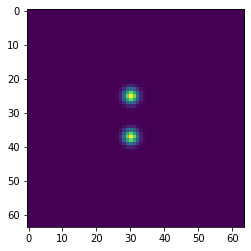

In [2]:
# Question 2
ny, nx = image.shape
X,Y = np.meshgrid(range(nx), range(ny))

def gaussienne_simple(x, y, amplitude, center_x, center_y, diameter):
    return amplitude*np.exp(-((x-center_x)**2 + (y-center_y)**2)/diameter**2)

def gaussienne_double(X, Y, amplitudeA, centerA_x, centerA_y, diameterA, amplitudeB, centerB_x, centerB_y, diameterB):
    return (gaussienne_simple(X, Y, amplitudeA, centerA_x, centerA_y, diameterA) + 
            gaussienne_simple(X, Y, amplitudeB, centerB_x, centerB_y, diameterB))
p0 = (1, 30, 25, 2, 1, 30, 37, 2)
image_test = gaussienne_double(X, Y, *p0)

fig = figure()
ax = fig.subplots()
ax.set_aspect(1)
ax.imshow(image_test)

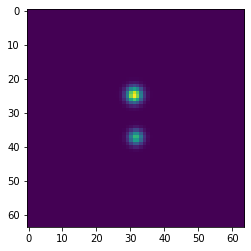

In [3]:
# Question 3
def gaussienne_double_fit(xdatas, *args):
    x, y = xdatas
    return gaussienne_double(x, y, *args)

popt, cov_mat = curve_fit(gaussienne_double_fit, [X.flatten(), Y.flatten()], image.flatten(), p0=p0)

image_fit = gaussienne_double(X, Y, *popt)

fig = figure()
ax = fig.subplots()
ax.set_aspect(1)
ax.imshow(image_fit)

In [4]:
# Question 4
amplitudeA, centerA_x, centerA_y, diameterA, amplitudeB, centerB_x, centerB_y, diameterB = popt

d = np.sqrt((centerA_x - centerB_x)**2 + (centerA_y - centerB_y)**2)
print(f'La distance entre les étoiles est de {d:.3f} pixels')

La distance entre les étoiles est de 12.464 pixels


In [5]:
var_x = cov_mat[1, 1] + cov_mat[5, 5] - 2*cov_mat[1, 5]
var_y = cov_mat[2, 2] + cov_mat[6, 6] - 2*cov_mat[2, 6]

std_distance = np.sqrt(var_x + var_y)
print(f"L'incertitude est de {std_distance:.3f} pixels")

L'incertitude est de 0.013 pixels
